In [48]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima

ModuleNotFoundError: No module named 'pyramid'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

base = pd.read_csv('AirPassengers.csv')

print(base.dtypes) #É preciso transformar o month em type date

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #Criando a variável pra ser usada como parâmetro de hora

base = pd.read_csv('AirPassengers.csv',parse_dates = ['Month'],index_col = 'Month',date_parser = dateparse) #importando o csv novamente mas configurando os atributos da coluna Month

ts = base['#Passengers']

Month          object
#Passengers     int64
dtype: object


C:\Users\147\Anaconda3\envs\R\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


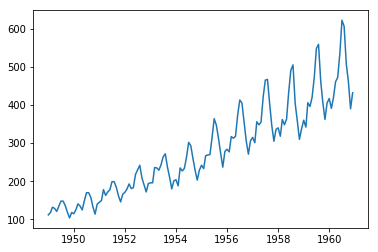

In [5]:
plt.plot(ts)

In [6]:
ts.mean() #média de todos os registros na série

280.2986111111111

In [8]:
ts['1960-01-01':'1960-12-01'].mean() #apenas do último 

476.1666666666667

In [11]:
media_movel = ts.rolling(window=12).mean() #média usando apenas os 12 registros anteriores

In [10]:
media_movel

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

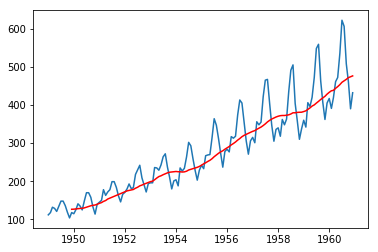

In [13]:
plt.plot(ts)
plt.plot(media_movel,color = 'red')

In [17]:
previsoes = []
for i in range(1,13):
    superior = len(media_movel) - i
    inferior = superior - 11
    #print(superior)
    #print(inferior)
    previsoes.append(media_movel[inferior:superior].mean())

In [18]:
previsoes

[453.52272727272737,
 449.37878787878793,
 444.9318181818182,
 440.5,
 436.04545454545456,
 431.5,
 427.1060606060606,
 422.75757575757575,
 418.52272727272725,
 414.34848484848493,
 409.90909090909093,
 405.50757575757575]

In [20]:
previsoes = previsoes[::-1]

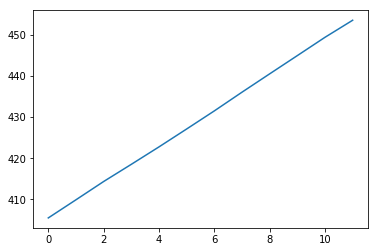

In [21]:
plt.plot(previsoes) 

In [25]:
#Utilizando o Arima
modelo = ARIMA(ts,order=(2,1,2))
modelo_treinado = modelo.fit()

C:\Users\147\Anaconda3\envs\R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\147\Anaconda3\envs\R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\147\Anaconda3\envs\R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Sun, 14 Apr 2019   AIC                           1344.043
Time:                        00:21:57   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5328      0.708      3.576      0.000       1.145       3.921
ar.L1.D.#Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.453      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.778      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [36]:
previsoes = modelo_treinado.forecast(steps = 12)[0] #As previsões estão no índice 0 da matriz

In [37]:
previsoes

array([433.12545505, 450.90267809, 479.83379995, 512.00008483,
       539.35352894, 555.83469208, 558.77827829, 549.30315486,
       531.67674357, 511.91303101, 496.04051808, 488.52327737])

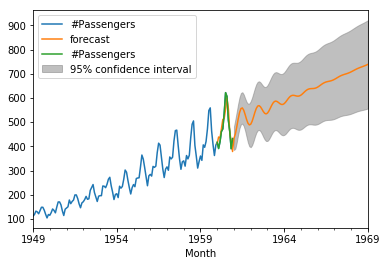

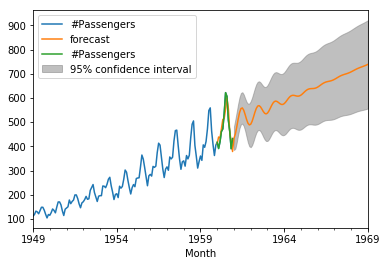

In [42]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01','1969-01-01', ax = eixo, plot_insample = True)

In [ ]:
#auto arima
modelo_auto = autoarima(ts,m=12,seasonal = True,trace = True)
modelo_auto.summary() #pegar os parâmetros em 'SARIMAX' e instanciar o modelo novamente:
modelo = ARIMA(ts,order=(2,1,2))
proximos_12 = modelo_auto.predict(n_periods = 12)